In [1]:
import os
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import numpy as np

%load_ext lab_black

In [2]:
def histogram(array, nbins=100):
    """
    Draw histogram from distribution and identify centers.
    Parameters
    ---------
    array: `class::np.array`
            Scores distribution
    nbins: int
            Number of bins to use in the histogram
    Return
    ---------
    float
            Histogram values and bin centers.
    """
    array = array.ravel().flatten()
    hist, bin_edges = np.histogram(array, bins=nbins, range=None)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.0
    return hist, bin_centers


def threshold_otsu(array, nbins=100):
    """
    Apply Otsu threshold on topic-region distributions [Otsu, 1979].
    Parameters
    ---------
    array: `class::np.array`
            Array containing the region values for the topic to be binarized.
    nbins: int
            Number of bins to use in the binarization histogram
    Return
    ---------
    float
            Binarization threshold.
    Reference
    ---------
    Otsu, N., 1979. A threshold selection method from gray-level histograms. IEEE transactions on systems, man, and
    cybernetics, 9(1), pp.62-66.
    """
    hist, bin_centers = histogram(array, nbins)
    hist = hist.astype(float)
    # Class probabilities for all possible thresholds
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    # Class means for all possible thresholds
    mean1 = np.cumsum(hist * bin_centers) / weight1
    mean2 = (np.cumsum((hist * bin_centers)[::-1]) / weight2[::-1])[::-1]
    # Clip ends to align class 1 and class 2 variables:
    # The last value of ``weight1``/``mean1`` should pair with zero values in
    # ``weight2``/``mean2``, which do not exist.
    variance12 = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    idx = np.argmax(variance12)
    threshold = bin_centers[:-1][idx]
    return threshold

Calculate the threshols and write a tsv file with barcodes to merge:

In [16]:
threshold_dict = {}
threshold_rank_dict = {}
threshold_min = 0.03
for file in sorted(
    glob.glob("full_preprocessing_out/data/reports/barcard/*barcard.tsv")
):
    sample = file.split("/")[-1].split(".")[0]
    print(sample)

    df = pd.read_csv(file, header=0, sep="\t")
    df = df.sort_values(by="jaccard", ascending=False)[:1000000]

    threshold = threshold_otsu(df["jaccard"])
    if threshold < threshold_min:
        threshold = threshold_min
    threshold_dict[sample] = threshold
    threshold_rank = sum(df["jaccard"] > threshold)
    threshold_rank_dict[sample] = threshold_rank
    print(f"\tthreshold: {threshold}")
    print(f"\tnpairs_merged: {threshold_rank}")

    df.reset_index(inplace=True, drop=True)
    df.iloc[:threshold_rank].to_csv(
        f"full_preprocessing_out/data/reports/barcard/{sample}.tomerge.tsv",
        sep="\t",
        index=False,
    )

BIO_ddseq_2
	threshold: 0.18316053950620667
	npairs_merged: 12000
BIO_ddseq_3
	threshold: 0.12615771275089893
	npairs_merged: 10159
BIO_ddseq_4
	threshold: 0.1208368803249002
	npairs_merged: 11887
BRO_mtscatac_1
	threshold: 0.03
	npairs_merged: 64
BRO_mtscatac_2
	threshold: 0.11749217984266253
	npairs_merged: 81
CNA_10xmultiome_1
	threshold: 0.03
	npairs_merged: 0
CNA_10xmultiome_2
	threshold: 0.03
	npairs_merged: 0
CNA_10xv11_1
	threshold: 0.11557721505744885
	npairs_merged: 47
CNA_10xv11_2
	threshold: 0.12880586148567424
	npairs_merged: 176
CNA_10xv11_3
	threshold: 0.044526678031719405
	npairs_merged: 182
CNA_10xv11_4
	threshold: 0.11432405898368428
	npairs_merged: 44
CNA_10xv11_5
	threshold: 0.10189141183826264
	npairs_merged: 50
CNA_10xv2_1
	threshold: 0.07902463003324783
	npairs_merged: 63
CNA_10xv2_2
	threshold: 0.13578690875089597
	npairs_merged: 91
CNA_ddseq_1
	threshold: 0.07991682939139869
	npairs_merged: 1531
CNA_ddseq_2
	threshold: 0.07531502381703245
	npairs_merged: 1566
C

BIO_ddseq_2
	threshold: 0.18316053950620667
	npairs_merged: 12000


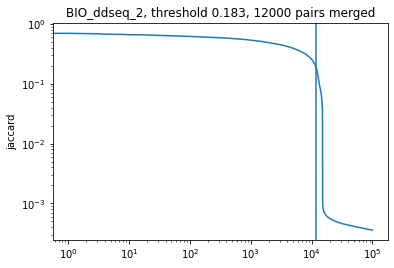

BIO_ddseq_3
	threshold: 0.12615771275089893
	npairs_merged: 10159


<Figure size 432x288 with 0 Axes>

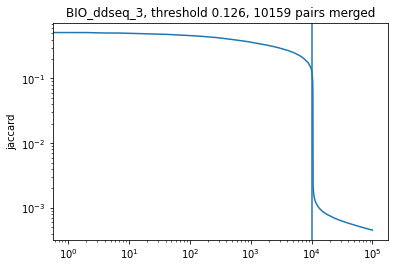

BIO_ddseq_4
	threshold: 0.1208368803249002
	npairs_merged: 11887


<Figure size 432x288 with 0 Axes>

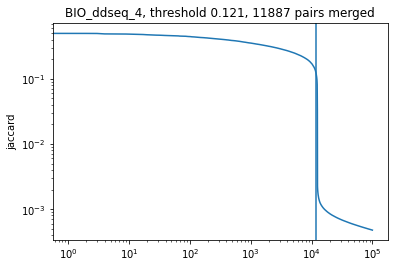

BRO_mtscatac_1
	threshold: 0.03
	npairs_merged: 64


<Figure size 432x288 with 0 Axes>

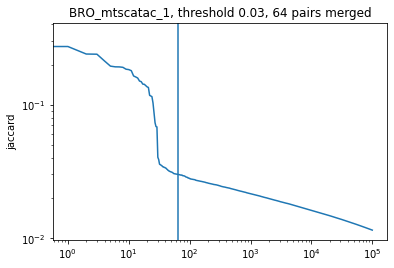

BRO_mtscatac_2
	threshold: 0.11749217984266253
	npairs_merged: 81


<Figure size 432x288 with 0 Axes>

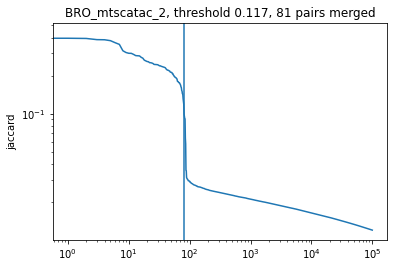

CNA_10xmultiome_1
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

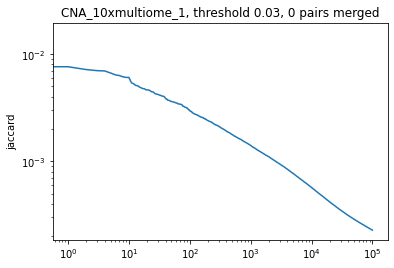

CNA_10xmultiome_2
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

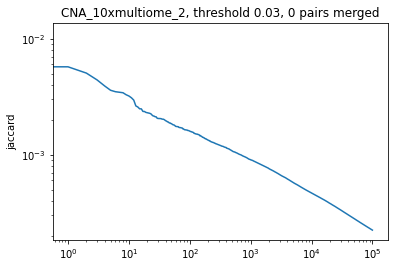

CNA_10xv11_1
	threshold: 0.11557721505744885
	npairs_merged: 47


<Figure size 432x288 with 0 Axes>

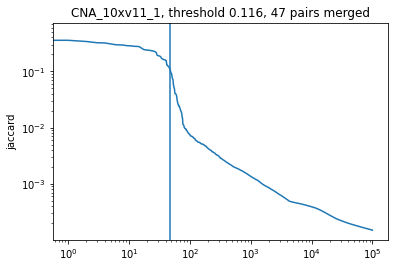

CNA_10xv11_2
	threshold: 0.12880586148567424
	npairs_merged: 176


<Figure size 432x288 with 0 Axes>

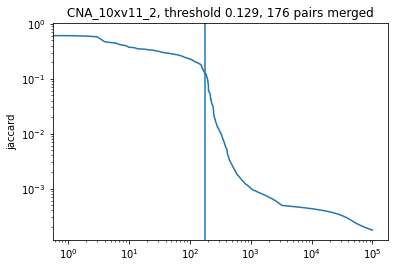

CNA_10xv11_3
	threshold: 0.044526678031719405
	npairs_merged: 182


<Figure size 432x288 with 0 Axes>

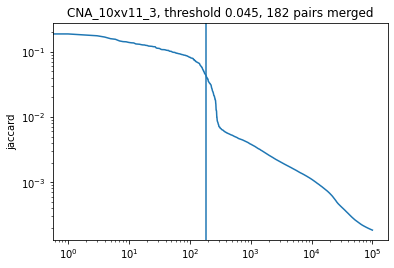

CNA_10xv11_4
	threshold: 0.11432405898368428
	npairs_merged: 44


<Figure size 432x288 with 0 Axes>

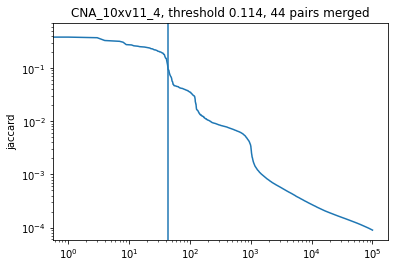

CNA_10xv11_5
	threshold: 0.10189141183826264
	npairs_merged: 50


<Figure size 432x288 with 0 Axes>

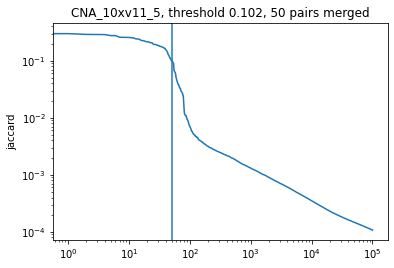

CNA_10xv2_1
	threshold: 0.07902463003324783
	npairs_merged: 63


<Figure size 432x288 with 0 Axes>

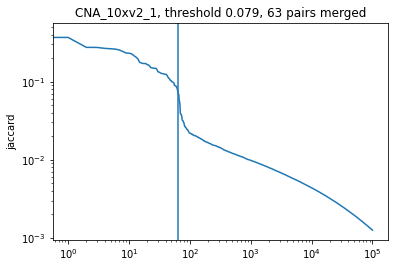

CNA_10xv2_2
	threshold: 0.13578690875089597
	npairs_merged: 91


<Figure size 432x288 with 0 Axes>

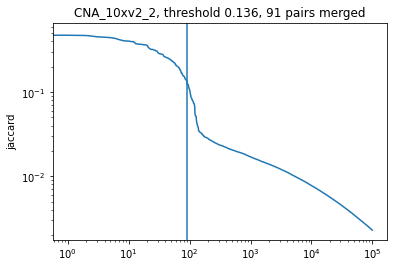

CNA_ddseq_1
	threshold: 0.07991682939139869
	npairs_merged: 1531


<Figure size 432x288 with 0 Axes>

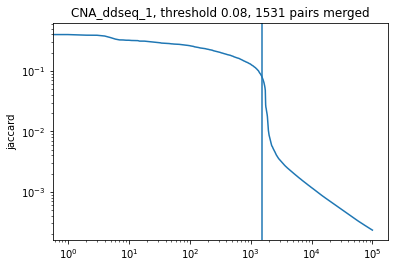

CNA_ddseq_2
	threshold: 0.07531502381703245
	npairs_merged: 1566


<Figure size 432x288 with 0 Axes>

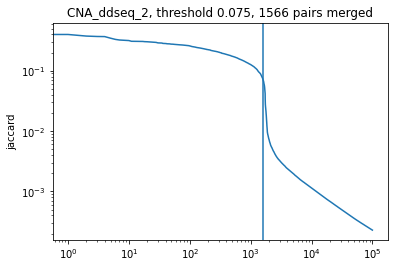

CNA_hydrop_41
	threshold: 0.07222004826483489
	npairs_merged: 503


<Figure size 432x288 with 0 Axes>

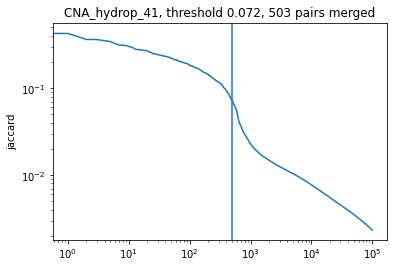

CNA_hydrop_42
	threshold: 0.0873753704293446
	npairs_merged: 397


<Figure size 432x288 with 0 Axes>

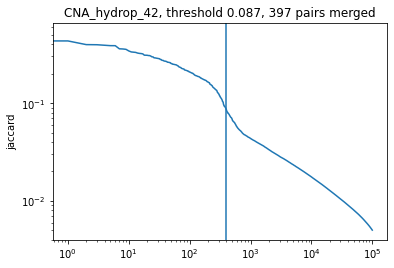

CNA_hydrop_51
	threshold: 0.069754084878411
	npairs_merged: 2320


<Figure size 432x288 with 0 Axes>

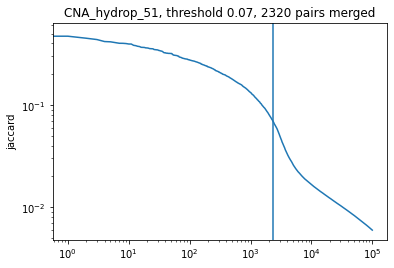

CNA_hydrop_52
	threshold: 0.07570752076197731
	npairs_merged: 671


<Figure size 432x288 with 0 Axes>

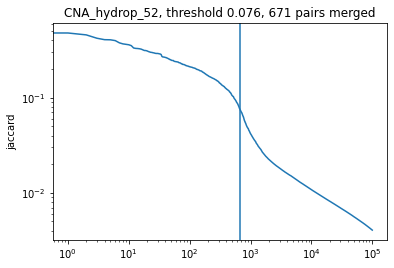

CNA_hydrop_61
	threshold: 0.0324143640609188
	npairs_merged: 19


<Figure size 432x288 with 0 Axes>

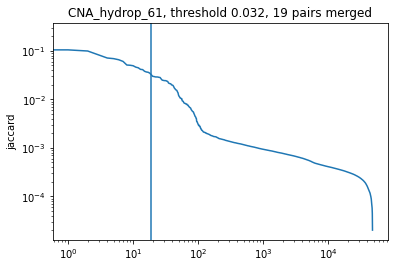

CNA_hydrop_62
	threshold: 0.03
	npairs_merged: 57


<Figure size 432x288 with 0 Axes>

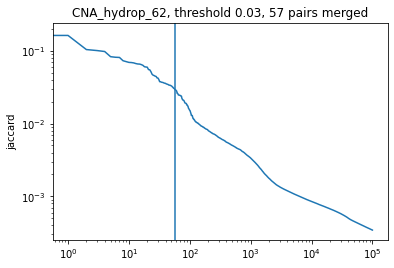

CNA_mtscatac_1
	threshold: 0.039463666751272136
	npairs_merged: 219


<Figure size 432x288 with 0 Axes>

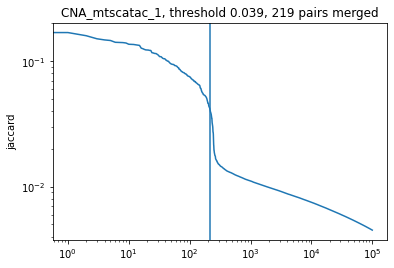

CNA_mtscatac_2
	threshold: 0.03
	npairs_merged: 30


<Figure size 432x288 with 0 Axes>

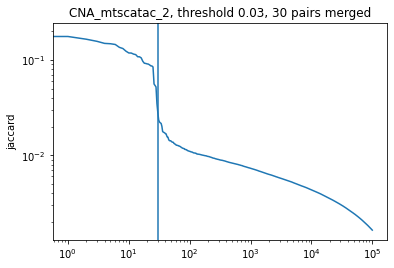

EPF_hydrop_21
	threshold: 0.03
	npairs_merged: 10


<Figure size 432x288 with 0 Axes>

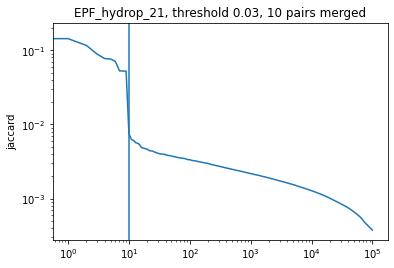

EPF_hydrop_22
	threshold: 0.06371237979004782
	npairs_merged: 5


<Figure size 432x288 with 0 Axes>

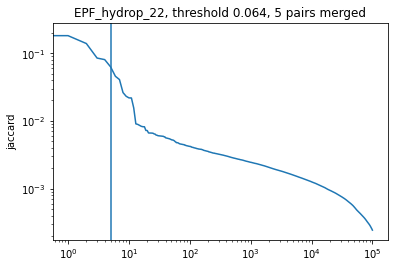

EPF_hydrop_23
	threshold: 0.050553565282588454
	npairs_merged: 19


<Figure size 432x288 with 0 Axes>

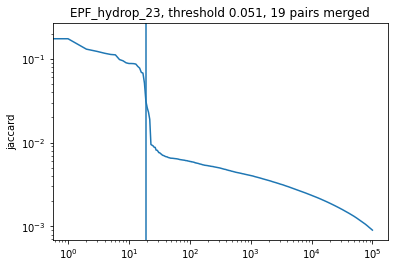

EPF_hydrop_24
	threshold: 0.11304974364988075
	npairs_merged: 4


<Figure size 432x288 with 0 Axes>

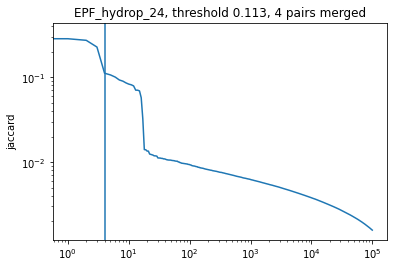

EPF_hydrop_31
	threshold: 0.12695949119985134
	npairs_merged: 44


<Figure size 432x288 with 0 Axes>

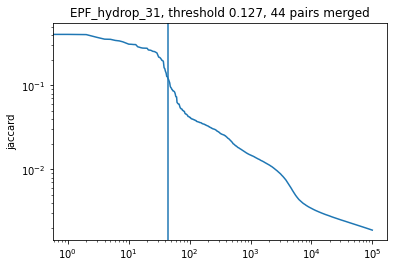

EPF_hydrop_32
	threshold: 0.13776825706034418
	npairs_merged: 26


<Figure size 432x288 with 0 Axes>

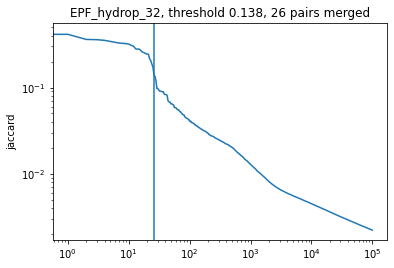

EPF_hydrop_33
	threshold: 0.13956997888118197
	npairs_merged: 50


<Figure size 432x288 with 0 Axes>

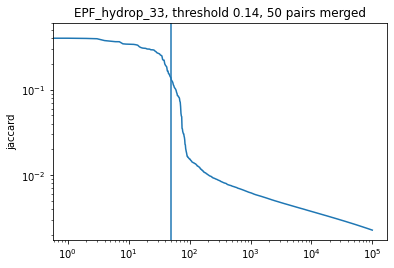

EPF_hydrop_34
	threshold: 0.141572021439196
	npairs_merged: 50


<Figure size 432x288 with 0 Axes>

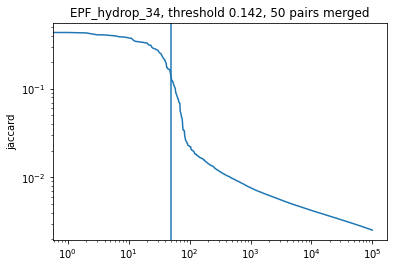

HAR_ddseq_1
	threshold: 0.03267035999961074
	npairs_merged: 3471


<Figure size 432x288 with 0 Axes>

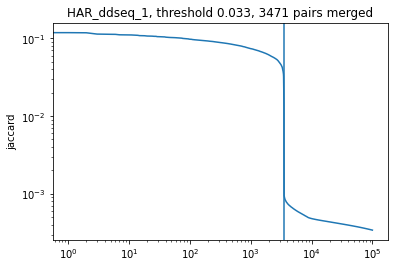

HAR_ddseq_2
	threshold: 0.03
	npairs_merged: 145


<Figure size 432x288 with 0 Axes>

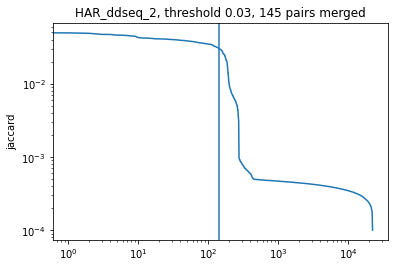

MDC_mtscatac_2
	threshold: 0.03
	npairs_merged: 417


<Figure size 432x288 with 0 Axes>

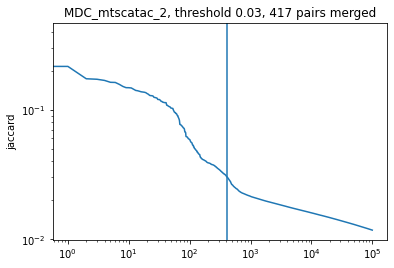

SAN_10xmultiome_1
	threshold: 0.03
	npairs_merged: 2


<Figure size 432x288 with 0 Axes>

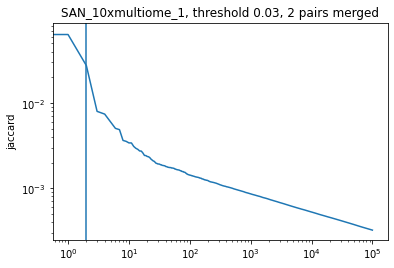

SAN_10xmultiome_2
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

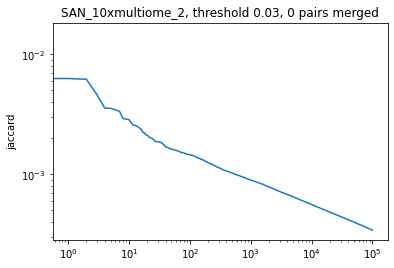

STA_10xv11_1
	threshold: 0.03
	npairs_merged: 1


<Figure size 432x288 with 0 Axes>

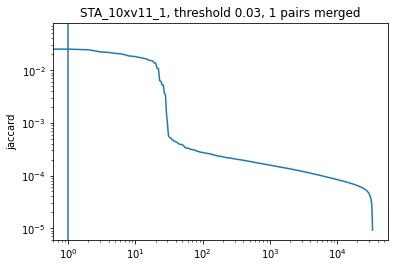

STA_10xv11_2
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

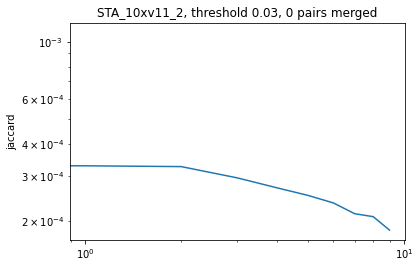

TXG_10xv11_1
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

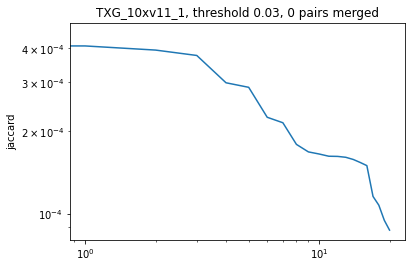

TXG_10xv2_1
	threshold: 0.08520602920084296
	npairs_merged: 86


<Figure size 432x288 with 0 Axes>

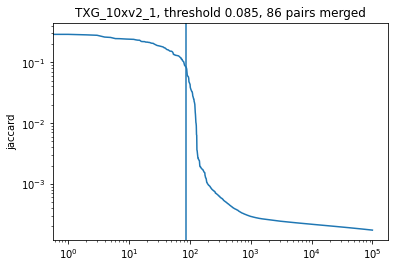

TXG_10xv2_2
	threshold: 0.07172990127842202
	npairs_merged: 82


<Figure size 432x288 with 0 Axes>

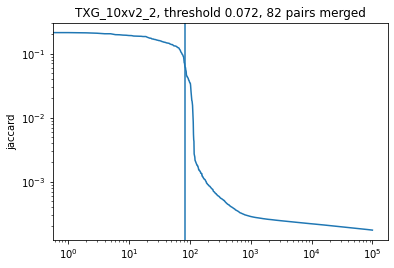

VIB_10xmultiome_1
	threshold: 0.09274918961514307
	npairs_merged: 2


<Figure size 432x288 with 0 Axes>

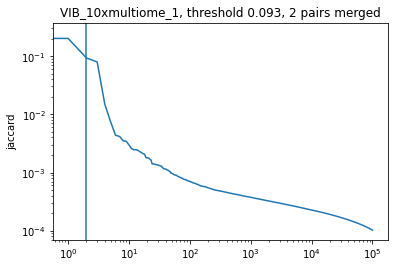

VIB_10xmultiome_2
	threshold: 0.043861024450927516
	npairs_merged: 8


<Figure size 432x288 with 0 Axes>

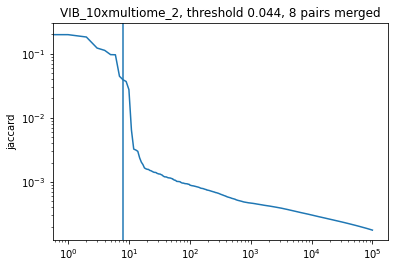

VIB_10xv11_1
	threshold: 0.05391259332120002
	npairs_merged: 249


<Figure size 432x288 with 0 Axes>

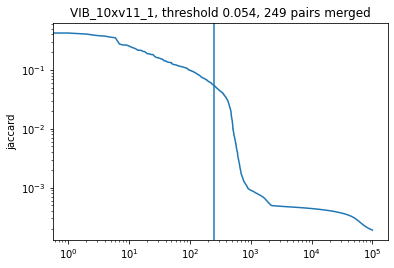

VIB_10xv11_2
	threshold: 0.03
	npairs_merged: 281


<Figure size 432x288 with 0 Axes>

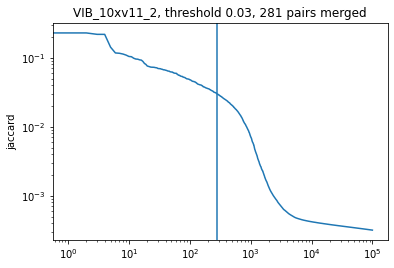

VIB_10xv1_1
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

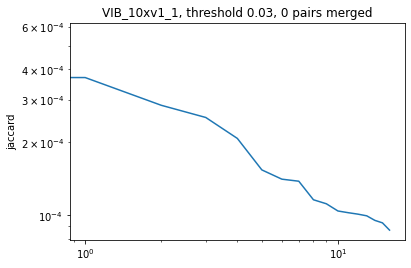

VIB_10xv1_2
	threshold: 0.03
	npairs_merged: 281


<Figure size 432x288 with 0 Axes>

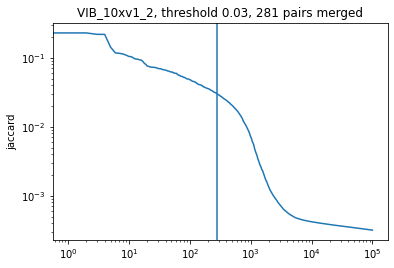

VIB_10xv2_1
	threshold: 0.05977217538676029
	npairs_merged: 18


<Figure size 432x288 with 0 Axes>

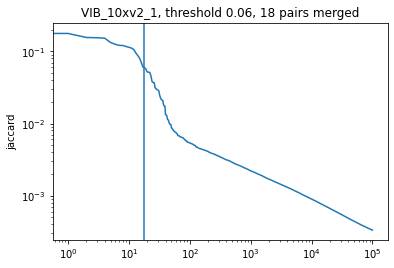

VIB_10xv2_2
	threshold: 0.06784939338618179
	npairs_merged: 44


<Figure size 432x288 with 0 Axes>

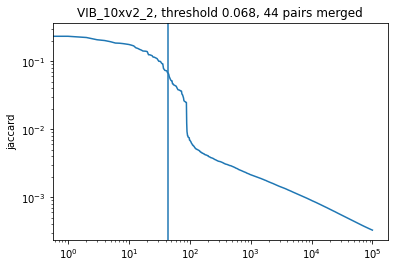

VIB_hydrop_11
	threshold: 0.1543979344995564
	npairs_merged: 16


<Figure size 432x288 with 0 Axes>

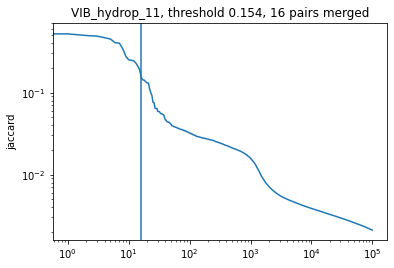

VIB_hydrop_12
	threshold: 0.17584584558200106
	npairs_merged: 33


<Figure size 432x288 with 0 Axes>

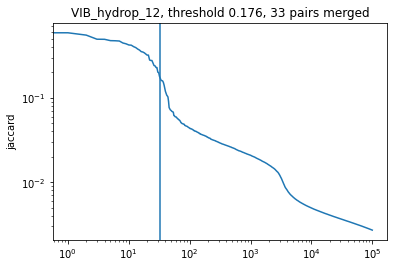

VIB_hydrop_21
	threshold: 0.1552423044001534
	npairs_merged: 72


<Figure size 432x288 with 0 Axes>

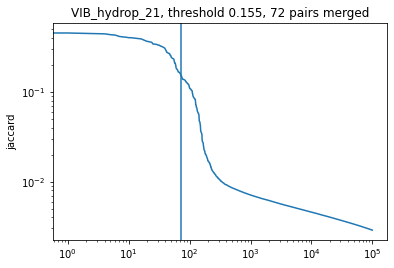

VIB_hydrop_22
	threshold: 0.08206400459859187
	npairs_merged: 150


<Figure size 432x288 with 0 Axes>

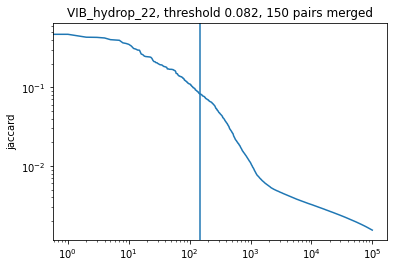

VIB_mtscatac_1
	threshold: 0.2555694907043242
	npairs_merged: 26


<Figure size 432x288 with 0 Axes>

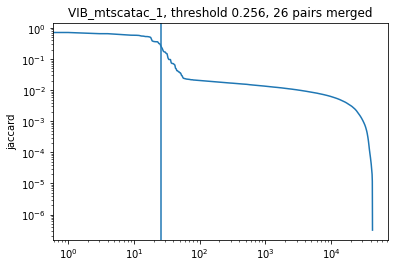

VIB_mtscatac_2
	threshold: 0.30027849918573624
	npairs_merged: 20


<Figure size 432x288 with 0 Axes>

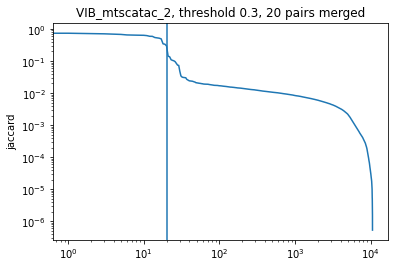

<Figure size 432x288 with 0 Axes>

In [18]:
for file in sorted(
    glob.glob("full_preprocessing_out/data/reports/barcard/*barcard.tsv")
):
    sample = file.split("/")[-1].split(".")[0]
    print(sample)
    df = pd.read_csv(file, header=0, sep="\t")

    df = df.sort_values(by="jaccard", ascending=False)[:100000]
    df.reset_index(inplace=True, drop=True)
    threshold = threshold_dict[sample]
    threshold_rank = threshold_rank_dict[sample]

    print(f"\tthreshold: {threshold}")
    print(f"\tnpairs_merged: {threshold_rank}")

    f, ax = plt.subplots(1, 1)
    sns.lineplot(data=df, x=range(len(df)), y="jaccard", ax=ax)
    # ax.axhline(y=threshold, xmin=0, xmax=10000000)
    ax.axvline(x=threshold_rank, ymin=0.0001, ymax=1)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_title(sample)
    ax.set_title(
        f"{sample}, threshold {round(threshold, 3)}, {threshold_rank} pairs merged"
    )
    plt.show()
    plt.savefig(
        f"plts_scratch/{sample}.bap_jaccard_kneeplot_linthreshold_resetindex.png",
        dpi=300,
        facecolor="white",
    )
    df.iloc[:threshold_rank].to_csv(
        f"full_preprocessing_out/data/reports/barcard/{sample}.tomerge.tsv",
        sep="\t",
        index=False,
    )

# without chrm

In [8]:
threshold_dict = {}
threshold_rank_dict = {}
threshold_min = 0.03
for file in sorted(
    glob.glob("full_preprocessing_out/data/reports/barcard/*barcard.nochrm.tsv")
):
    sample = file.split("/")[-1].split(".")[0]
    print(sample)

    df = pd.read_csv(file, header=0, sep="\t")
    df = df.sort_values(by="jaccard", ascending=False)[:1000000]

    threshold = threshold_otsu(df["jaccard"])
    if threshold < threshold_min:
        threshold = threshold_min
    threshold_dict[sample] = threshold
    threshold_rank = sum(df["jaccard"] > threshold)
    threshold_rank_dict[sample] = threshold_rank
    print(f"\tthreshold: {threshold}")
    print(f"\tnpairs_merged: {threshold_rank}")

    df.reset_index(inplace=True, drop=True)
    df.iloc[:threshold_rank].to_csv(
        f"full_preprocessing_out/data/reports/barcard/{sample}.tomerge.tsv",
        sep="\t",
        index=False,
    )

BIO_ddseq_2
	threshold: 0.18135383162331786
	npairs_merged: 12026
BIO_ddseq_3
	threshold: 0.12580154180398634
	npairs_merged: 10104
BIO_ddseq_4
	threshold: 0.11800855030386279
	npairs_merged: 11871
BRO_mtscatac_1
	threshold: 0.052608487083233665
	npairs_merged: 27
BRO_mtscatac_2
	threshold: 0.0841632891391623
	npairs_merged: 79
CNA_10xmultiome_1
	threshold: 0.03
	npairs_merged: 0
CNA_10xmultiome_2
	threshold: 0.03
	npairs_merged: 0
CNA_10xv11_1
	threshold: 0.11414219315999966
	npairs_merged: 47
CNA_10xv11_2
	threshold: 0.12168844842647235
	npairs_merged: 182
CNA_10xv11_3
	threshold: 0.043386163552595204
	npairs_merged: 185
CNA_10xv11_4
	threshold: 0.11393970997583398
	npairs_merged: 44
CNA_10xv11_5
	threshold: 0.10013739677889835
	npairs_merged: 50
CNA_10xv2_1
	threshold: 0.07036817637944737
	npairs_merged: 65
CNA_10xv2_2
	threshold: 0.12389431732920111
	npairs_merged: 91
CNA_ddseq_1
	threshold: 0.075417416521432
	npairs_merged: 1530
CNA_ddseq_2
	threshold: 0.07527053243077805
	npairs_

BIO_ddseq_2
BIO_ddseq_3
BIO_ddseq_4
BRO_mtscatac_1
BRO_mtscatac_2
CNA_10xmultiome_1
CNA_10xmultiome_2
CNA_10xv11_1
CNA_10xv11_2
CNA_10xv11_3
CNA_10xv11_4
CNA_10xv11_5
CNA_10xv2_1
CNA_10xv2_2
CNA_ddseq_1
CNA_ddseq_2
CNA_hydrop_41
CNA_hydrop_42
CNA_hydrop_51
CNA_hydrop_52
CNA_hydrop_61
CNA_hydrop_62
CNA_mtscatac_1
CNA_mtscatac_2
EPF_hydrop_21
EPF_hydrop_22
EPF_hydrop_23
EPF_hydrop_24
EPF_hydrop_31
EPF_hydrop_32
EPF_hydrop_33
EPF_hydrop_34
HAR_ddseq_1
HAR_ddseq_2
MDC_mtscatac_2
SAN_10xmultiome_1
SAN_10xmultiome_2
STA_10xv11_1
STA_10xv11_2
TXG_10xv11_1
TXG_10xv2_1
TXG_10xv2_2
VIB_10xmultiome_1
VIB_10xmultiome_2
VIB_10xv11_1
VIB_10xv11_2
	threshold: 0.03
	npairs_merged: 279


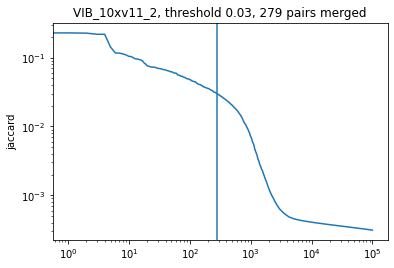

VIB_10xv1_1
	threshold: 0.03
	npairs_merged: 0


<Figure size 432x288 with 0 Axes>

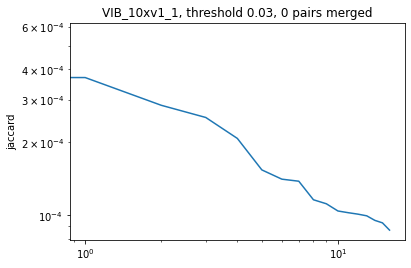

VIB_10xv1_2
	threshold: 0.03
	npairs_merged: 279


<Figure size 432x288 with 0 Axes>

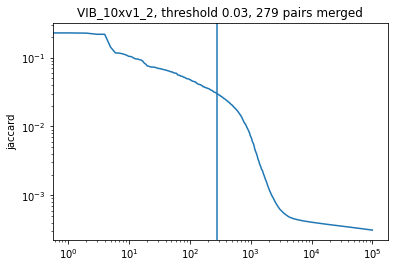

VIB_10xv2_1
	threshold: 0.06128089995775629
	npairs_merged: 17


<Figure size 432x288 with 0 Axes>

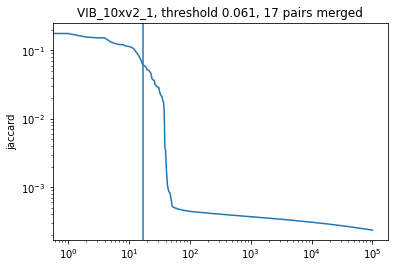

VIB_10xv2_2
	threshold: 0.06746936768828934
	npairs_merged: 43


<Figure size 432x288 with 0 Axes>

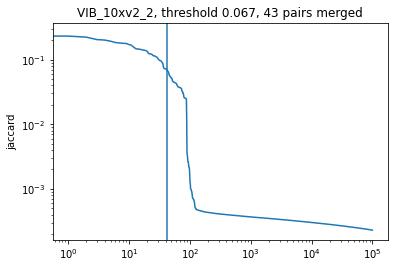

VIB_hydrop_11
	threshold: 0.09675777090034865
	npairs_merged: 19


<Figure size 432x288 with 0 Axes>

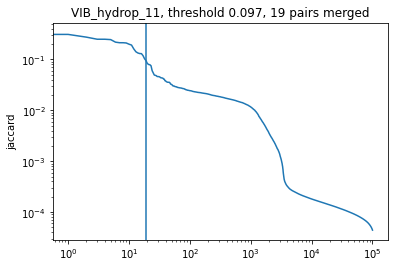

VIB_hydrop_12
	threshold: 0.09875431016553503
	npairs_merged: 38


<Figure size 432x288 with 0 Axes>

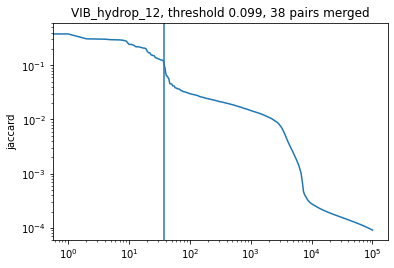

VIB_hydrop_21
	threshold: 0.08259627896859746
	npairs_merged: 87


<Figure size 432x288 with 0 Axes>

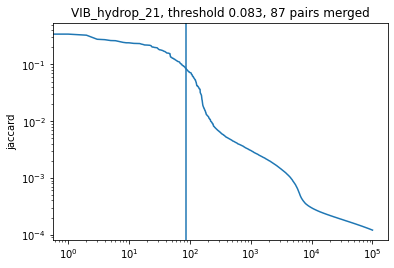

VIB_hydrop_22
	threshold: 0.0439938003927429
	npairs_merged: 282


<Figure size 432x288 with 0 Axes>

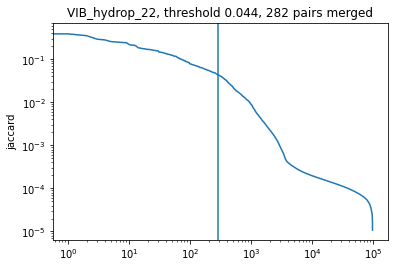

VIB_mtscatac_1
	threshold: 0.16694675197520373
	npairs_merged: 26


<Figure size 432x288 with 0 Axes>

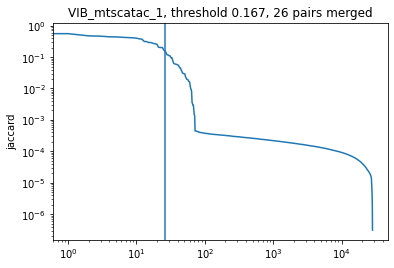

VIB_mtscatac_2
	threshold: 0.1698310185161616
	npairs_merged: 14


<Figure size 432x288 with 0 Axes>

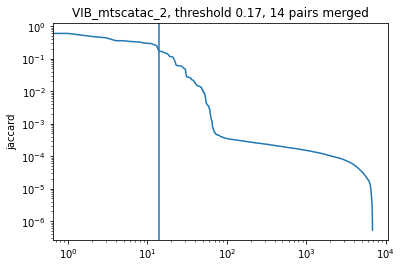

<Figure size 432x288 with 0 Axes>

In [9]:
for file in sorted(
    glob.glob("full_preprocessing_out/data/reports/barcard/*barcard.nochrm.tsv")
):
    sample = file.split("/")[-1].split(".")[0]
    print(sample)
    outfile = f"full_preprocessing_out/data/reports/barcard/{sample}.tomerge.nochrm.tsv"

    if not os.path.exists(outfile):
        df = pd.read_csv(file, header=0, sep="\t")

        df = df.sort_values(by="jaccard", ascending=False)[:100000]
        df.reset_index(inplace=True, drop=True)
        threshold = threshold_dict[sample]
        threshold_rank = threshold_rank_dict[sample]

        print(f"\tthreshold: {threshold}")
        print(f"\tnpairs_merged: {threshold_rank}")

        f, ax = plt.subplots(1, 1)
        sns.lineplot(data=df, x=range(len(df)), y="jaccard", ax=ax)
        # ax.axhline(y=threshold, xmin=0, xmax=10000000)
        ax.axvline(x=threshold_rank, ymin=0.0001, ymax=1)
        ax.set_xscale("log")
        ax.set_yscale("log")
        ax.set_title(sample)
        ax.set_title(
            f"{sample}, threshold {round(threshold, 3)}, {threshold_rank} pairs merged"
        )
        plt.show()
        plt.savefig(
            f"plts_scratch/{sample}.bap_jaccard_kneeplot_linthreshold_resetindex.nochrm.png",
            dpi=300,
            facecolor="white",
        )
        df.iloc[:threshold_rank].to_csv(
            outfile,
            sep="\t",
            index=False,
        )

All seems good. There are some samples where arguably the knee is below 3%, but the number of affected barcode pairs is low, and reducing the global minimum below 3% will introduce artifacts in other samples, so I will keep the global minimum at 3%.